In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D 

In [31]:
x = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])
y = np.array([0, 0.5, 1, 1.5, 2, 2.5, 3, 4, 5])

In [32]:
thetaHist=np.empty([10, 2])

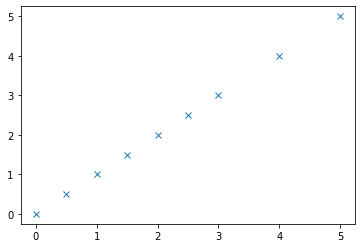

In [33]:
# Plot training set
fig = plt.figure(1)  # An empty figure with no axes
plt.plot(x, y, 'x')

In [90]:
theta0 = np.arange(-2, 2.01, 0.25)
theta1 = np.arange(-2, 3.01, 0.25)

J = np.empty([len(theta1), len(theta0)])
for i in range(0, len(theta0)):  
    for j in range(0, len(theta1)):
        b = theta0[i]
        w = theta1[j]
        J[j][i] = 0
        for n in range(len(y)):
            J[j][i] = J[j][i] + (b + w*x[n] - y[n])**2
        J[j][i] = J[j][i]/(2*len(y))
        
theta0_axis, theta1_axis = np.meshgrid(theta0, theta1)

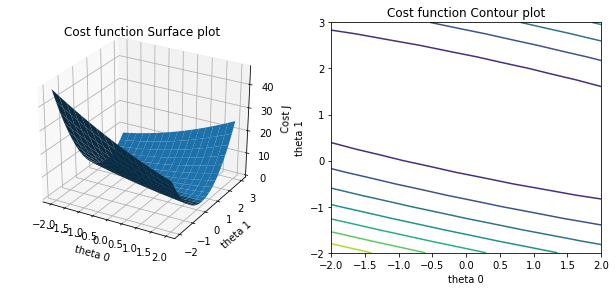

In [92]:
fig2 = plt.figure(2)
ax = fig2.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0_axis, theta1_axis, J)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')

ax = fig2.add_subplot(122)
contour = ax.contour(theta0_axis, theta1_axis, J)
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig2.subplots_adjust(bottom=0.1, right=1.5, top=0.9)

In [61]:
def gradientDescent(x, y, theta0, theta1, alpha, maxsteps, mode = 'regular'):
    # recording the path from the initail guess
    theta0Hist = [theta0]
    theta1Hist = [theta1]
    grad0Sum = 0
    grad1Sum = 0
    for i in range(0, maxsteps):
        theta0_grad = 0
        theta1_grad = 0
        for j in range(0, len(y)):
            theta0_grad = theta0_grad + (theta0 + theta1*x[j] - y[j])
            theta1_grad = theta0_grad + (theta0 + theta1*x[j] - y[j])*x[j]
        theta0_grad = theta0_grad/len(y)
        theta1_grad = theta1_grad/len(y)
        
        grad0Sum = grad0Sum + theta0_grad**2
        grad1Sum = grad1Sum + theta1_grad**2
        
        # Now, we refresh the theta0 and theta1 simultaneously
        if mode == 'regular':
            theta0 = theta0 - alpha*theta0_grad
            theta1 = theta1 - alpha*theta1_grad
        elif mode == 'Adagrad':
            theta0 = theta0 - alpha/np.sqrt(grad0Sum) * theta0_grad
            theta1 = theta1 - alpha/np.sqrt(grad0Sum) * theta1_grad
        
        # Restore the theta to see the improvement process
        theta0Hist.append(theta0)
        theta1Hist.append(theta1)
         
    return theta0, theta1, theta0Hist, theta1Hist

In [75]:
theta_0, theta_1, theta0Hist, theta1Hist = gradientDescent(x, y, 2.0, 0.0, 0.01, 10000, mode = 'Adagrad')

In [89]:
theta0

array([-2.  , -1.75, -1.5 , -1.25, -1.  , -0.75, -0.5 , -0.25,  0.  ,
        0.25,  0.5 ,  0.75,  1.  ,  1.25,  1.5 ,  1.75,  2.  ])

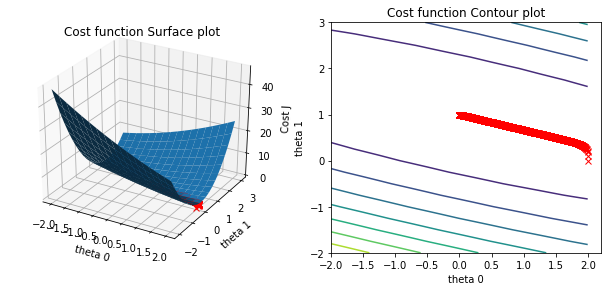

In [96]:
fig3 = plt.figure(2)
ax = fig3.add_subplot(121, projection="3d")
surf = ax.plot_surface(theta0_axis, theta1_axis, J)
plt.plot(theta0Hist, theta1Hist, 'x', color = 'r')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_zlabel('Cost J')
ax.set_title('Cost function Surface plot')


ax = fig3.add_subplot(122)
contour = ax.contour(theta0_axis, theta1_axis, J)
plt.plot(theta0Hist, theta1Hist, 'x', color = 'r')
ax.set_xlabel('theta 0')
ax.set_ylabel('theta 1')
ax.set_title('Cost function Contour plot')

fig3.subplots_adjust(bottom=0.1, right=1.5, top=0.9)